Menganalisa trend produksi jenis tas tertentu dari rentang waktu januari 2018 sampai dengan desember 2023 ditandai dengan M1 sampai dengan M144.
Model matematika dalam menganalisa produksi adalah non-linear least square reggression. Dalam regresi non-linear, hubungan antara 𝑦 dan 𝑋
tidak linier dan dapat diwakili oleh fungsi non-linier dari parameter:
y=β
0
​
 +β
1
​
 e ^
β
2
​
 x
 +ϵ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('data3.csv')
df.head()

,month,production
0,1,1863
1,2,1614
2,3,2570
3,4,1685
4,5,2101


preprocessing data: untuk memeriksa apakah ada nilai yang hilang atau data yang terdublikasi pada dataset yang diberikan

In [11]:
df.isnull().sum()
df.dropna(inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)

Menerapkan model matematika non-linear least square reggression

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimal values:
Parameter 1: 2146.779
Parameter 2: -0.015
Parameter 3: -235.987


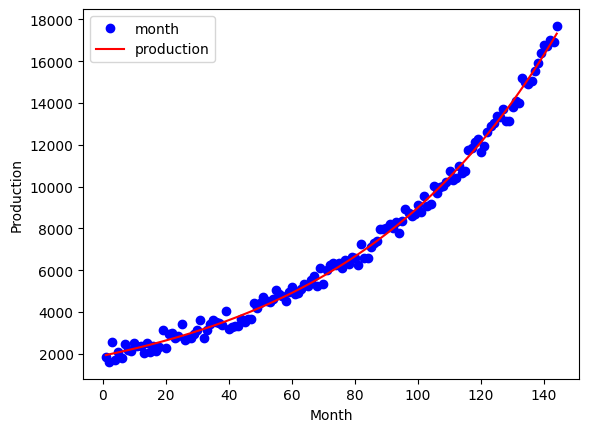

In [39]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
  return a * np.exp(-b * x) + c

x = df['month']
y = df['production']
popt, pcov = curve_fit(func, x, y)
print("Optimal values:")
for i, val in enumerate(popt):
    print(f"Parameter {i+1}: {val:.3f}")


plt.plot(x, y, 'bo', label='month')
plt.plot(x, func(x, *popt), 'r-', label='production')
plt.xlabel('Month')
plt.ylabel('Production')
plt.legend()
plt.show()


Menghitung skor akurasi model menggunakan R^2 score:
r^2 score juga dikenal sebagai koefisien determinasi, adalah ukuran yang menunjukkan seberapa baik prediksi regresi mendekati titik data sebenarnya. Skor berkisar dari 0 hingga 1. semakin mendekati 1 maka skor akurasi makin baik

In [43]:
# prompt: calculate accuracy score

from sklearn.metrics import r2_score
y_pred = func(x, *popt)
accuracy_score = r2_score(y, y_pred)
print("Accuracy score:", accuracy_score)


Accuracy score: 0.9954354739478551


Memprediksi pembangunan gudang baru dengan menggunakan newton_raphson root finding.
Metode Newton-Raphson cocok digunakan pada case ini karena metode newton_raphson secara efisien menemukan akar dari sebuah fungsi
𝑓(𝑡) di mana 𝑡 mewakili waktu dalam bulan dalam skenario ini.
selain itu, Metode Newton-Raphson bersifat serbaguna dan dapat menangani berbagai macam fungsi.

In [24]:
def f(t):
  return 25000*t - 325000
def g(t):
  return 25000

In [27]:
def newton_raphson(t0,tolerance):
  t1 = t0 - f(t0)/g(t0)

  if(np.abs(f(t1)) < tolerance):
    print("root ditemukan pada t : ",t1)
    return t1

  newton_raphson(t1,tolerance)

In [30]:
root = newton_raphson(13,1e-6)
kapan_bangun = int(root) - 1
print(f"pembangunan gudang baru sebaiknya di mulai pada bulan =  {kapan_bangun}.")

root ditemukan pada t :  13.0
pembangunan gudang baru sebaiknya di mulai pada bulan =  12.
